In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../data/processed/air_quality_cleaned.csv')

In [ ]:
print(df.head())
print(df.info())
print(df.describe())

        City        date  PM2.5  PM10    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI  
0  133.36     0.00     0.02    0.00  NaN  
1   34.06     3.68     5.50    3.77  NaN  
2   30.70     6.80    16.40    2.25  NaN  
3   36.08     4.43    10.14    1.00  NaN  
4   39.31     7.01    18.89    2.78  NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     29531 non-null  object 
 1   date     29531 non-null  object 
 2   PM2.5    29504 non-null  float6

In [ ]:
df = df.dropna(subset=['PM2.5'])

In [ ]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [ ]:
df = df.drop_duplicates()
print(f"Data shape after removing duplicates: {df.shape}")

Data shape after removing duplicates: (29504, 14)


In [ ]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.to_csv('../data/processed/air_quality_cleaned.csv' , index=False)

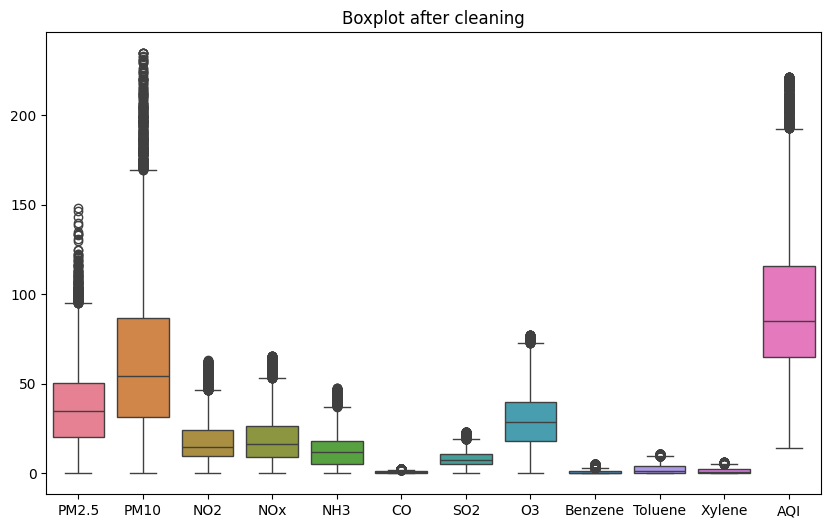

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[num_cols])
plt.title('Boxplot after cleaning')
plt.show()

In [ ]:
print("Data cleaning completed. Cleaned data saved as 'cleaned_air_data.csv'")

Data cleaning completed. Cleaned data saved as 'cleaned_air_data.csv'
